# Introduction to Convolutional Neural Networks and Computer Vision (CV) with TensorFlow

CV is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self.driving car recognizing the car in front.

## Get the data

The images we're working with are form the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

# !wget means download this file and put it in Google Colab Notebook
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-13 23:12:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   238MB/s    in 0.4s    

2022-10-13 23:12:44 (238 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
# !ls stands for "list" (as in list files in...)
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Don't see extra file ".DS_Store" as in video ??
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct 13 23:12 .
drwxr-xr-x 1 root root 4096 Oct 13 23:12 ..
drwxr-xr-x 4 root root 4096 Oct 13 23:12 test
drwxr-xr-x 4 root root 4096 Oct 13 23:12 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our image, first let's get the class names programmatically

In [8]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_anems from the subdirectories
# class_names = class_names[1:] # not needing this... cuz not seeing ".DS_Store"...
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  # random_image will return as a list, so indexing 0 to return a string

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2902766.jpg']
Image shape: (384, 512, 3)


array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [30, 24, 10],
        [27, 21,  7],
        [25, 19,  5]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [32, 26, 12],
        [30, 24, 10],
        [30, 24, 10]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [30, 24, 10],
        [30, 24, 10],
        [33, 27, 13]],

       ...,

       [[50, 41, 10],
        [51, 42, 11],
        [55, 46, 13],
        ...,
        [23, 14,  9],
        [23, 14,  9],
        [25, 16, 11]],

       [[46, 37,  6],
        [48, 39,  8],
        [52, 43, 10],
        ...,
        [23, 16, 10],
        [23, 14,  9],
        [24, 15, 10]],

       [[47, 38,  7],
        [48, 39,  6],
        [53, 44, 11],
        ...,
        [24, 17, 11],
        [23, 14,  9],
        [21, 12,  7]]], dtype=uint8)

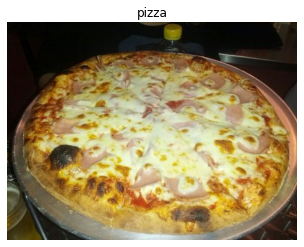

In [10]:
# View a random image from the training dataset
view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

['763690.jpg']
Image shape: (512, 512, 3)


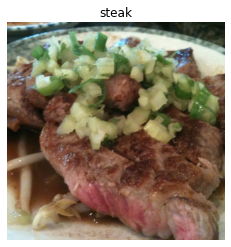

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [12]:
img

array([[[132,  71,  53],
        [132,  74,  54],
        [138,  80,  58],
        ...,
        [ 13,  27,  12],
        [ 14,  28,  13],
        [ 15,  29,  14]],

       [[133,  76,  59],
        [135,  78,  59],
        [140,  83,  63],
        ...,
        [ 15,  29,  14],
        [ 16,  30,  15],
        [ 18,  32,  17]],

       [[134,  83,  66],
        [136,  85,  66],
        [141,  90,  69],
        ...,
        [ 16,  30,  15],
        [ 17,  31,  16],
        [ 19,  33,  18]],

       ...,

       [[214, 234, 233],
        [213, 233, 232],
        [212, 232, 231],
        ...,
        [163, 166, 147],
        [167, 168, 150],
        [173, 174, 156]],

       [[216, 234, 234],
        [215, 233, 233],
        [213, 231, 231],
        ...,
        [163, 166, 147],
        [164, 166, 145],
        [169, 171, 150]],

       [[218, 236, 236],
        [216, 234, 234],
        [214, 232, 232],
        ...,
        [168, 171, 152],
        [168, 170, 149],
        [170, 172, 151]]

In [13]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[132,  71,  53],
        [132,  74,  54],
        [138,  80,  58],
        ...,
        [ 13,  27,  12],
        [ 14,  28,  13],
        [ 15,  29,  14]],

       [[133,  76,  59],
        [135,  78,  59],
        [140,  83,  63],
        ...,
        [ 15,  29,  14],
        [ 16,  30,  15],
        [ 18,  32,  17]],

       [[134,  83,  66],
        [136,  85,  66],
        [141,  90,  69],
        ...,
        [ 16,  30,  15],
        [ 17,  31,  16],
        [ 19,  33,  18]],

       ...,

       [[214, 234, 233],
        [213, 233, 232],
        [212, 232, 231],
        ...,
        [163, 166, 147],
        [167, 168, 150],
        [173, 174, 156]],

       [[216, 234, 234],
        [215, 233, 233],
        [213, 231, 231],
        ...,
        [163, 166, 147],
        [164, 166, 145],
        [169, 171, 150]],

       [[218, 236, 236],
        [216, 234, 234],
        [214, 232, 232],
        ...,
        [168, 171, 15

In [14]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [15]:
# Normalize input data (get all ixel values between 0 & 1)
img/255.

array([[[0.51764706, 0.27843137, 0.20784314],
        [0.51764706, 0.29019608, 0.21176471],
        [0.54117647, 0.31372549, 0.22745098],
        ...,
        [0.05098039, 0.10588235, 0.04705882],
        [0.05490196, 0.10980392, 0.05098039],
        [0.05882353, 0.11372549, 0.05490196]],

       [[0.52156863, 0.29803922, 0.23137255],
        [0.52941176, 0.30588235, 0.23137255],
        [0.54901961, 0.3254902 , 0.24705882],
        ...,
        [0.05882353, 0.11372549, 0.05490196],
        [0.0627451 , 0.11764706, 0.05882353],
        [0.07058824, 0.1254902 , 0.06666667]],

       [[0.5254902 , 0.3254902 , 0.25882353],
        [0.53333333, 0.33333333, 0.25882353],
        [0.55294118, 0.35294118, 0.27058824],
        ...,
        [0.0627451 , 0.11764706, 0.05882353],
        [0.06666667, 0.12156863, 0.0627451 ],
        [0.0745098 , 0.12941176, 0.07058824]],

       ...,

       [[0.83921569, 0.91764706, 0.91372549],
        [0.83529412, 0.91372549, 0.90980392],
        [0.83137255, 0

## An end-to-end example 

Let's build a CNN to find patterns in our images, precisely need a way to:

* Load the images
* Preprocess the images
* Build a CNN to find patterns in the images
* Compile the CNN
* Fit the CNN to the training data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# putting in batches helps use less memory!!

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (normalize all pixel values to be within 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, batch_size=32, target_size=(224, 224),
    class_mode = "binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir, batch_size=32, target_size=(224, 224),
    class_mode = "binary",
    seed=42
)


# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=valid_data, validation_steps=len(valid_data)
)

# Changing run-time type to GPU makes it a lot faster!! (from ~90s to ~17s for one epoch)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 221ms/step - loss: 0.5838 - accuracy: 0.6847 - val_loss: 0.3853 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4214 - accuracy: 0.8080 - val_loss: 0.3525 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4158 - accuracy: 0.8253 - val_loss: 0.3690 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3647 - accuracy: 0.8427 - val_loss: 0.3394 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3326 - accuracy: 0.8540 - val_loss: 0.2896 - val_accuracy: 0.8860


**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (may have to rerun some cells above)

Look up CNN explainer, very hands-on/documented tool to understand CNNs well!!!

**Practice/Exercise:** Go through CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data. 

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88167&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [17]:
# set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=valid_data, validation_steps=len(valid_data)
)


Epoch 1/5
47/47 [==============================] - 9s 193ms/step - loss: 1.7422 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it. For model_3:
* increase hidden units from 4 to 100
* add another hidden layer (2 to 3)

In [19]:
# set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=valid_data, validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 2.2701 - accuracy: 0.6473 - val_loss: 0.6587 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 1.6198 - accuracy: 0.6560 - val_loss: 1.5077 - val_accuracy: 0.6160
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.8046 - accuracy: 0.7273 - val_loss: 0.7214 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6307 - accuracy: 0.7367 - val_loss: 0.6352 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5546 - accuracy: 0.7500 - val_loss: 0.4611 - val_accuracy: 0.7940


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


model_3 has 500x the parameters than the CNN (model_1) but still performs ~10% worst. That's the power of CNNs!!! (why?)

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is, the difference here is that two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **convolutional neural network seeks to sort out and learn the most imnportant patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechipering between different **features** in an image.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for the model, mainly do scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3531805.jpg']
Image shape: (512, 512, 3)
['1407753.jpg']
Image shape: (512, 384, 3)


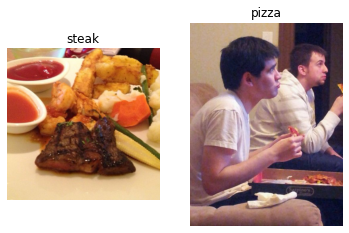

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(train_dir+'/', "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(train_dir+'/', "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = train_dir+'/'
test_dir = test_dir+'/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

A couple reasons for this:
1. 10k+ images might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well. With 32 at a time, it can run through more epochs to learn more.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224), # Target size of images (height, width)
    class_mode="binary", # type of data you're working with
    batch_size=32 # size of minibatches to load data into
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)
train_data, test_data

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7f5c4a40d610>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f5c4a4b1bd0>)

In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)(

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem).

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)),
    # typically for input layer, best to specify input shape ^^
    # if padding is "same", output shape is ame as input shape, if "valid", output shape gets compressed
    # stride is how many pixels the filter moves each step of the convolution
    # if image is not dense with detail, can get away with choosing higher stride values (less computationally intensive that way)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only one out put (flattened) neuron)
])

**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/


In [34]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy", # dealing with binary classification
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [35]:
# Get a summary of our model
model_4.summary() # notice how shape is slowly compressing (losing edges) due to padding being "valid"

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit( # this is a combination of labels and sample data
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.8881 - accuracy: 0.7160 - val_loss: 0.4231 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4220 - accuracy: 0.8140 - val_loss: 0.3837 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2891 - accuracy: 0.8860 - val_loss: 0.3765 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1228 - accuracy: 0.9653 - val_loss: 0.4403 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.0338 - accuracy: 0.9920 - val_loss: 0.5706 - val_accuracy: 0.7940


In [38]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.2896 - accuracy: 0.8860


[0.28964996337890625, 0.8859999775886536]

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [40]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.5706 - accuracy: 0.7940


[0.570634126663208, 0.7940000295639038]

### 5. Evaluating our model

It looks like our model is learning, let's evaluate it

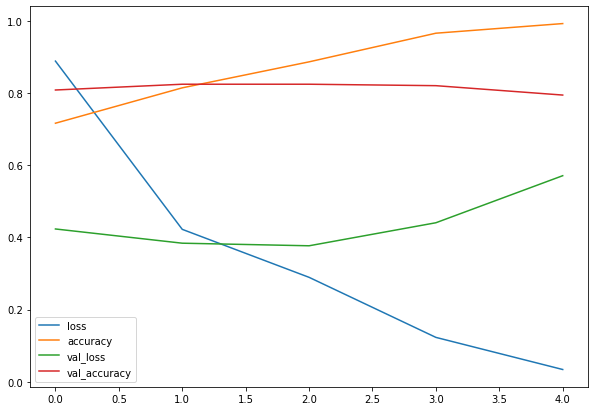

In [41]:
# Let's plot the training curves
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7));

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

In [42]:
h4 = history_4.history

In [43]:
h4["loss"]

[0.8880656957626343,
 0.4220242202281952,
 0.289126455783844,
 0.12277613580226898,
 0.03381479158997536]

In [44]:
h4["val_loss"]

[0.42307648062705994,
 0.3836740553379059,
 0.3765144348144531,
 0.44030994176864624,
 0.5706342458724976]

In [45]:
h4["accuracy"]

[0.7160000205039978,
 0.8140000104904175,
 0.8859999775886536,
 0.9653333425521851,
 0.9919999837875366]

In [46]:
h4["val_accuracy"]

[0.8080000281333923,
 0.8240000009536743,
 0.8240000009536743,
 0.8199999928474426,
 0.7940000295639038]

In [47]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  
  # Plot accuracy
  plt.figure() # create new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()  

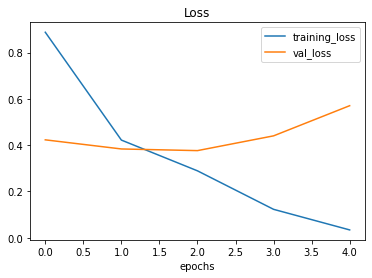

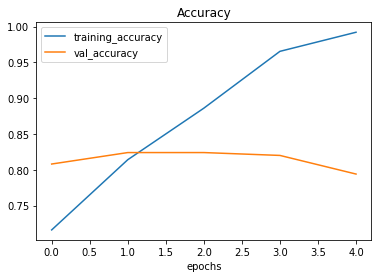

In [48]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create the baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2S)
* Add more data...

> **Note:** Reduciing overfitting is also known as **regularization**.

In [49]:
# Create a model, this will be our new baseline
model_5 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid") 
])

# MaxPooling layers seems to compress the image... 
# (finds the most importat part of image.. is that why it's a "max"?? and not say "mean", "median", or "min")

In [50]:
# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [51]:
# Fit the model
history_5 = model_5.fit( 
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.6086 - accuracy: 0.6607 - val_loss: 0.4688 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4525 - accuracy: 0.7860 - val_loss: 0.4058 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4230 - accuracy: 0.8120 - val_loss: 0.3399 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3935 - accuracy: 0.8347 - val_loss: 0.3247 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3735 - accuracy: 0.8340 - val_loss: 0.3355 - val_accuracy: 0.8480


In [52]:
# Get a summary of our model with max pooling 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [53]:
# compare with model_4 
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [54]:
# model_4 has ~50x more parameters, but perfoms worst. This is the power of Max Pooling!!!

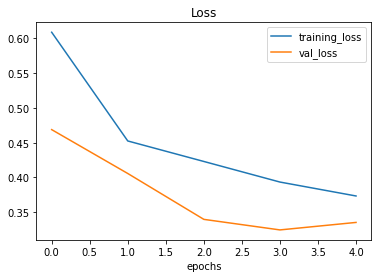

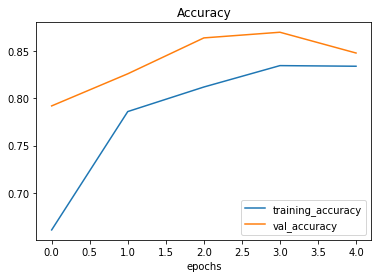

In [55]:
# Plot loss curves
plot_loss_curves(history_5) # notice how training and validation are headed in same direciton... no overfitting here
# essentially maxpooling has gotten ridden of overfitting; from evaluating, even if there's now less parameters
# it seems like those parameters are of more value. By reducing the detail, can focus on generalized patterns better (right?)

### Opening our bag of tricks and finding data augmentation

In [56]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255., rotation_range=.2, # how much do you want to rotate the image
    shear_range=.2, zoom_range=.2, width_shift_range=.2,
    height_shift_range=.3, horizontal_flip=True
) # ^^ basically affine transformations...

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [57]:
# Import data and augment it from training directory
print("Augmented training data.")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create non-augmented trian data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), batch_size=32, class_mode="binary", shuffle=False
)


IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary"
)

Augmented training data.
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [58]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only the images are

showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

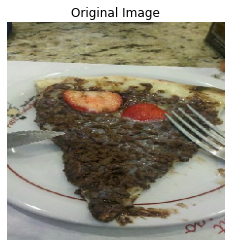

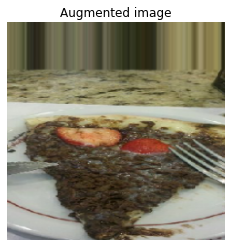

In [59]:
# Show the original image alongside augmented image
import random
random_number = random.randint(0, 31) # our batch sizes are 32...

print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)



Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data

In [60]:
# Create a model (same structure as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model (fitting model_6 on augmented training data)
history_6 = model_6.fit( 
    train_data_augmented,
    epochs=5, steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

# model taking double the time... too many augmentation adjustments??

Epoch 1/5
47/47 [==============================] - 23s 491ms/step - loss: 0.7346 - accuracy: 0.5153 - val_loss: 0.6909 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6957 - accuracy: 0.5100 - val_loss: 0.6756 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.7188 - accuracy: 0.5773 - val_loss: 0.6688 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6915 - accuracy: 0.5347 - val_loss: 0.6608 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6789 - accuracy: 0.5947 - val_loss: 0.6374 - val_accuracy: 0.7640


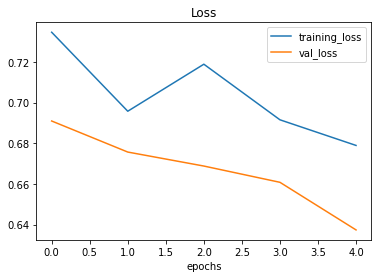

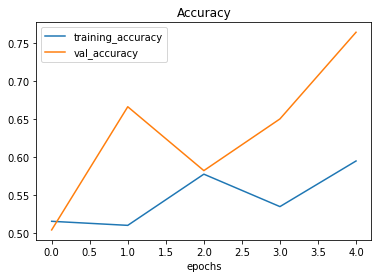

In [61]:
# Check out model loss and accuracy curves
plot_loss_curves(history_6)

We're passing the same augmented training data, but we are shuffling it

In [62]:
# Import data, augment it, and shuffle it from training directory
print("Augmented training data.")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Augmented training data.
Found 1500 images belonging to 2 classes.


In [63]:
# Create a model (same structure as model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model (fitting model_6 on augmented training data)
history_7 = model_7.fit( 
    train_data_augmented,
    epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 24s 495ms/step - loss: 0.7172 - accuracy: 0.5287 - val_loss: 0.6726 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6858 - accuracy: 0.5073 - val_loss: 0.6613 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6827 - accuracy: 0.5553 - val_loss: 0.6468 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6766 - accuracy: 0.5533 - val_loss: 0.6532 - val_accuracy: 0.5400
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6520 - accuracy: 0.6140 - val_loss: 0.6252 - val_accuracy: 0.6280


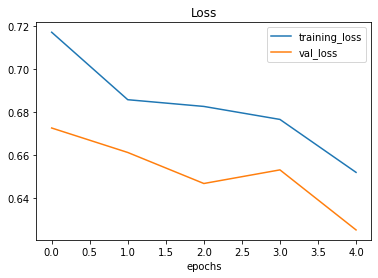

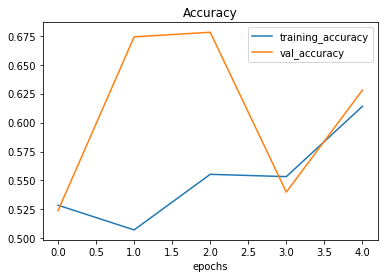

In [64]:
plot_loss_curves(history_7)

In [65]:
# my model's seem to be more eradic then David's models (model_6 & model_7)... why??

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, this enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak). 

### Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* use **transfer learning** to leverage what another image has learn and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our custom data

In [66]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-10-13 23:21:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2022-10-13 23:21:16 (283 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

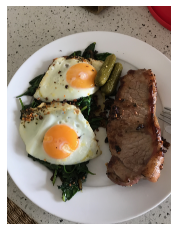

In [67]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [68]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [69]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes
  it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape]) 
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img



In [70]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [75]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 16ms/step


Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, visualize the image as well as the mdoel's prediction?

In [74]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [76]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [78]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  

1/1 [==============================] - 0s 20ms/step


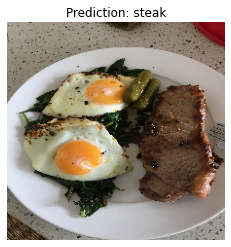

In [79]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza

--2022-10-13 23:40:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2022-10-13 23:40:14 (310 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


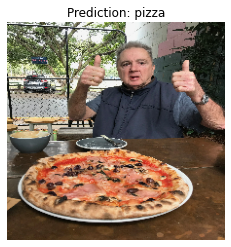

In [80]:
# Download another test custom image an dmake a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get ir ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the mdoel (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data.

In [83]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-13 23:49:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   262MB/s    in 1.9s    

2022-10-13 23:49:44 (262 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [84]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 1

In [86]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [87]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['25250.jpg']
Image shape: (512, 384, 3)


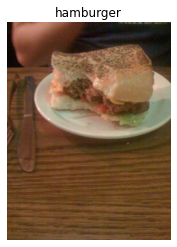

In [91]:
# Visualize, visualize, visualize
import random 

img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)
)

### 2. Preprocess the data (prepare it for a model)

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = (224, 224)
# Load data in from direcctories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=32, class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


# Fit a model


In [97]:
# Fit the model
history_8 = model_8.fit(
    train_data, # now 10 different clases
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25*len(test_data))
)

Epoch 1/5
235/235 [==============================] - 39s 165ms/step - loss: 2.2188 - accuracy: 0.1583 - val_loss: 2.1363 - val_accuracy: 0.2105
Epoch 2/5
235/235 [==============================] - 38s 162ms/step - loss: 2.0183 - accuracy: 0.2847 - val_loss: 2.0137 - val_accuracy: 0.2812
Epoch 3/5
235/235 [==============================] - 39s 164ms/step - loss: 1.7081 - accuracy: 0.4189 - val_loss: 1.9514 - val_accuracy: 0.3454
Epoch 4/5
235/235 [==============================] - 38s 162ms/step - loss: 1.1066 - accuracy: 0.6315 - val_loss: 2.2199 - val_accuracy: 0.2993
Epoch 5/5
235/235 [==============================] - 39s 164ms/step - loss: 0.4688 - accuracy: 0.8553 - val_loss: 3.3102 - val_accuracy: 0.2862


In [96]:
len(train_data)

235

### 5. Evaluate the model

In [98]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 3.2361 - accuracy: 0.2808


[3.236088991165161, 0.2808000147342682]

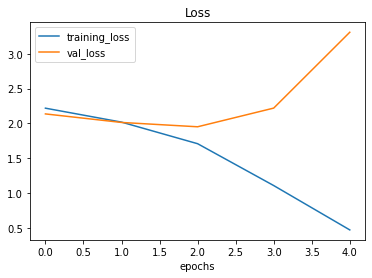

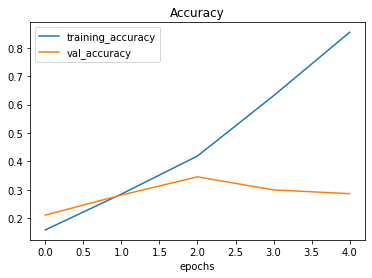

In [99]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well...it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the basline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...

* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfger learning leverages the patterns another model has learned on similar data to your own allows you to use those patterns on your own dataset

In [105]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"] 
)

In [106]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [101]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [107]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(
    train_data, epochs=5, steps_per_epoch=len(train_data),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 46s 194ms/step - loss: 2.3315 - accuracy: 0.2361 - val_loss: 1.9523 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.7845 - accuracy: 0.3957 - val_loss: 1.9147 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 1.4463 - accuracy: 0.5260 - val_loss: 2.0179 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 1.0680 - accuracy: 0.6575 - val_loss: 2.1897 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 0.6703 - accuracy: 0.8012 - val_loss: 2.5154 - val_accuracy: 0.3028


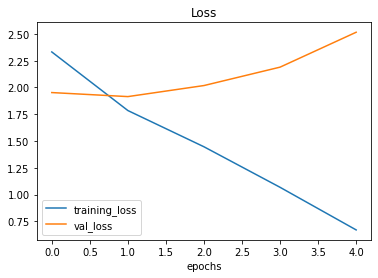

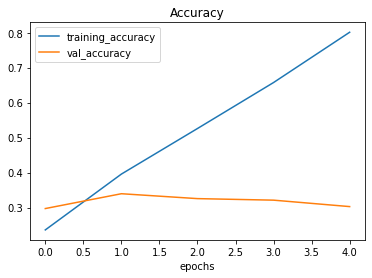

In [108]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [109]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [110]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and imrove our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [118]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255., rotation_range=.2, # how much do you want to rotate the image
    shear_range=.2, zoom_range=.2, width_shift_range=.2,
    height_shift_range=.2, horizontal_flip=True
) # ^^ basically affine transformations...
# shuffle is true by default 

print("Augmented training data.")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Augmented training data.
Found 7500 images belonging to 10 classes.


In [119]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 data
model_10 = tf.keras.models.clone_model(model_8) # cloning because its same as model_8
# copies model ^^ but resets all internally learned parameters...
model_10.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"] 
)

In [120]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [121]:
# Fit the model 
history_10 = model_10.fit(
    train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
    validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 113s 480ms/step - loss: 2.3544 - accuracy: 0.0611 - val_loss: 2.3025 - val_accuracy: 0.1016
Epoch 2/5
235/235 [==============================] - 111s 474ms/step - loss: 2.3042 - accuracy: 0.0387 - val_loss: 2.3025 - val_accuracy: 0.1040
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 2.3039 - accuracy: 0.0673 - val_loss: 2.3025 - val_accuracy: 0.1028
Epoch 4/5
235/235 [==============================] - 112s 477ms/step - loss: 2.3039 - accuracy: 0.0759 - val_loss: 2.3024 - val_accuracy: 0.1004
Epoch 5/5
235/235 [==============================] - 112s 476ms/step - loss: 2.3040 - accuracy: 0.0736 - val_loss: 2.3023 - val_accuracy: 0.1000


In [122]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 3.2361 - accuracy: 0.2808


[3.236088752746582, 0.2808000147342682]

In [123]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 2.3023 - accuracy: 0.1000


[2.3022875785827637, 0.10000000149011612]

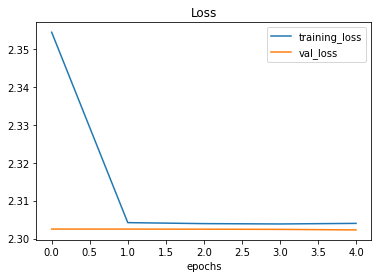

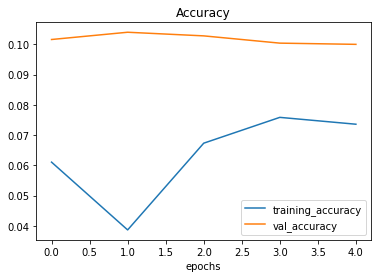

In [124]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

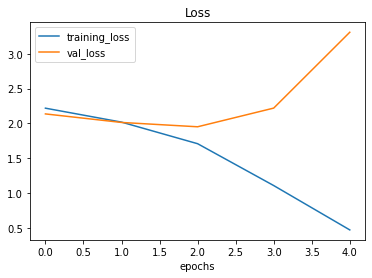

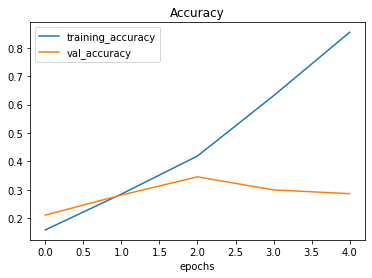

In [125]:
plot_loss_curves(history_8) 

Woah! That looks much  better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied


We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try differtent methods of data augmentation (adjust hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs) 
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [126]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [127]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-10-14 01:53:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-10-14 01:53:14 (272 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2022-10-14 01:53:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [130]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [138]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1: pred_class = class_names[tf.argmax(pred[0])]
  else: pred_class = class_names[int(tf.round(pred[0]))]
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  

1/1 [==============================] - 0s 16ms/step


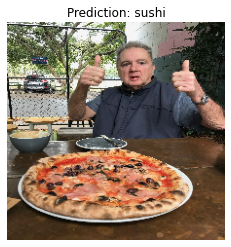

In [139]:
# Make a prediction using model_10
pred_and_plot(model=model_10, filename='03-pizza-dad.jpeg', class_names=class_names)

1/1 [==============================] - 0s 20ms/step


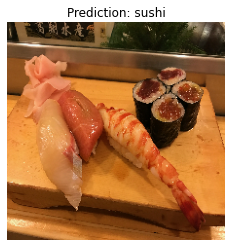

In [140]:
pred_and_plot(model=model_10, filename='03-sushi.jpeg', class_names=class_names)

1/1 [==============================] - 0s 17ms/step


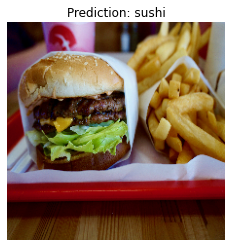

In [141]:
pred_and_plot(model=model_10, filename='03-hamburger.jpeg', class_names=class_names)

1/1 [==============================] - 0s 17ms/step


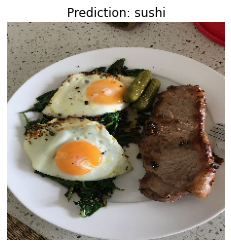

In [142]:
pred_and_plot(model=model_10, filename='03-steak.jpeg', class_names=class_names)

1/1 [==============================] - 0s 19ms/step


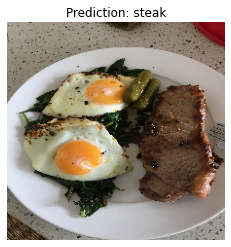

In [143]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(
    model=model_3,
    filename="03-steak.jpeg",
    class_names=["pizza", "steak"]
)

### Saving and loading our model

In [146]:
# Save a model
model_10.save("saved_train_model_10") # this doesn't seem to save properly... (more on this...)

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_train_model_10")
loaded_model_10.evaluate(test_data)